Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle

First reload the data we generated in `1_notmnist.ipynb`.

In [3]:
data_root = os.path.join('.', 'notMNIST_data') # Change me to store data elsewhere
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [4]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [5]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

First, the logistic model

In [6]:
batch_size = 128

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_reg = tf.placeholder(tf.float32, shape=(1))
    tf_train_dataset_entire = tf.constant(train_dataset)
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = (tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
            + tf_reg*tf.nn.l2_loss(weights))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    train_prediction_entire = tf.nn.softmax(tf.matmul(tf_train_dataset_entire, weights) + biases)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

Initialized
Minibatch loss at step 0: 16.525492
Minibatch accuracy: 10.9%
Validation accuracy: 9.6%
Minibatch loss at step 500: 1.049642
Minibatch accuracy: 82.8%
Validation accuracy: 75.5%
Minibatch loss at step 1000: 1.665137
Minibatch accuracy: 75.8%
Validation accuracy: 77.4%
Minibatch loss at step 1500: 1.069627
Minibatch accuracy: 79.7%
Validation accuracy: 77.8%
Minibatch loss at step 2000: 0.870529
Minibatch accuracy: 85.9%
Validation accuracy: 77.9%
Minibatch loss at step 2500: 1.163913
Minibatch accuracy: 75.0%
Validation accuracy: 78.7%
Minibatch loss at step 3000: 0.926614
Minibatch accuracy: 78.9%
Validation accuracy: 79.4%
Minibatch loss at step 3500: 0.919146
Minibatch accuracy: 78.1%
Validation accuracy: 79.5%
Minibatch loss at step 4000: 0.792175
Minibatch accuracy: 82.0%
Validation accuracy: 80.1%
Minibatch loss at step 4500: 0.810969
Minibatch accuracy: 83.6%
Validation accuracy: 80.4%
Minibatch loss at step 5000: 0.673741
Minibatch accuracy: 85.9%
Validation accurac

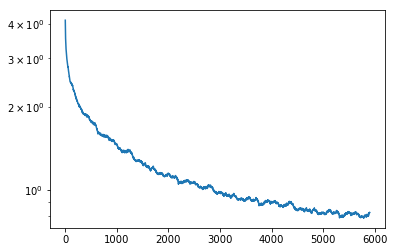

Initialized
Minibatch loss at step 0: 24.275299
Minibatch accuracy: 12.5%
Validation accuracy: 10.5%
Minibatch loss at step 500: 1.635028
Minibatch accuracy: 82.0%
Validation accuracy: 76.2%
Minibatch loss at step 1000: 1.795811
Minibatch accuracy: 80.5%
Validation accuracy: 76.8%
Minibatch loss at step 1500: 0.916630
Minibatch accuracy: 84.4%
Validation accuracy: 78.2%
Minibatch loss at step 2000: 1.107391
Minibatch accuracy: 82.8%
Validation accuracy: 78.3%
Minibatch loss at step 2500: 1.103527
Minibatch accuracy: 76.6%
Validation accuracy: 79.7%
Minibatch loss at step 3000: 0.996068
Minibatch accuracy: 83.6%
Validation accuracy: 80.3%
Minibatch loss at step 3500: 0.913937
Minibatch accuracy: 79.7%
Validation accuracy: 80.3%
Minibatch loss at step 4000: 0.788650
Minibatch accuracy: 83.6%
Validation accuracy: 81.4%
Minibatch loss at step 4500: 0.775011
Minibatch accuracy: 85.2%
Validation accuracy: 81.1%
Minibatch loss at step 5000: 0.669394
Minibatch accuracy: 85.9%
Validation accura

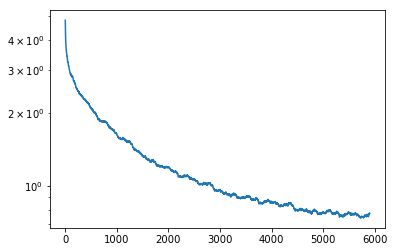

Initialized
Minibatch loss at step 0: 18.865128
Minibatch accuracy: 10.2%
Validation accuracy: 14.9%
Minibatch loss at step 500: 2.422030
Minibatch accuracy: 79.7%
Validation accuracy: 76.4%
Minibatch loss at step 1000: 1.734652
Minibatch accuracy: 82.0%
Validation accuracy: 78.7%
Minibatch loss at step 1500: 1.012797
Minibatch accuracy: 81.2%
Validation accuracy: 80.3%
Minibatch loss at step 2000: 0.837446
Minibatch accuracy: 87.5%
Validation accuracy: 80.7%
Minibatch loss at step 2500: 0.858851
Minibatch accuracy: 78.9%
Validation accuracy: 81.2%
Minibatch loss at step 3000: 0.768057
Minibatch accuracy: 82.8%
Validation accuracy: 81.8%
Minibatch loss at step 3500: 0.726754
Minibatch accuracy: 81.2%
Validation accuracy: 81.2%
Minibatch loss at step 4000: 0.661684
Minibatch accuracy: 82.8%
Validation accuracy: 82.4%
Minibatch loss at step 4500: 0.667842
Minibatch accuracy: 82.0%
Validation accuracy: 82.1%
Minibatch loss at step 5000: 0.596563
Minibatch accuracy: 85.2%
Validation accura

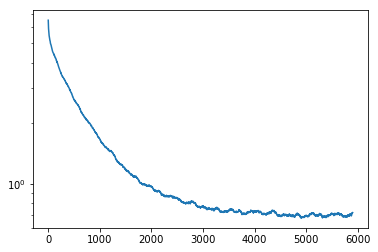

Initialized
Minibatch loss at step 0: 25.028221
Minibatch accuracy: 14.1%
Validation accuracy: 13.2%
Minibatch loss at step 500: 2.253042
Minibatch accuracy: 84.4%
Validation accuracy: 77.8%
Minibatch loss at step 1000: 1.048671
Minibatch accuracy: 81.2%
Validation accuracy: 81.2%
Minibatch loss at step 1500: 0.553388
Minibatch accuracy: 85.9%
Validation accuracy: 81.3%
Minibatch loss at step 2000: 0.598743
Minibatch accuracy: 89.1%
Validation accuracy: 81.7%
Minibatch loss at step 2500: 0.724898
Minibatch accuracy: 80.5%
Validation accuracy: 81.6%
Minibatch loss at step 3000: 0.719047
Minibatch accuracy: 84.4%
Validation accuracy: 81.8%
Minibatch loss at step 3500: 0.709104
Minibatch accuracy: 81.2%
Validation accuracy: 80.8%
Minibatch loss at step 4000: 0.654403
Minibatch accuracy: 82.0%
Validation accuracy: 82.4%
Minibatch loss at step 4500: 0.672893
Minibatch accuracy: 82.0%
Validation accuracy: 82.0%
Minibatch loss at step 5000: 0.618605
Minibatch accuracy: 84.4%
Validation accura

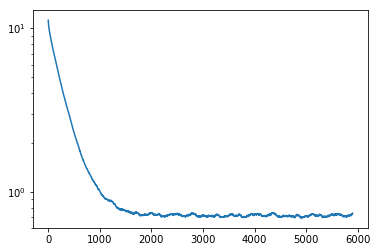

Initialized
Minibatch loss at step 0: 47.153442
Minibatch accuracy: 7.0%
Validation accuracy: 15.4%
Minibatch loss at step 500: 0.723798
Minibatch accuracy: 89.1%
Validation accuracy: 81.4%
Minibatch loss at step 1000: 0.799161
Minibatch accuracy: 80.5%
Validation accuracy: 81.3%
Minibatch loss at step 1500: 0.566145
Minibatch accuracy: 83.6%
Validation accuracy: 81.1%
Minibatch loss at step 2000: 0.648482
Minibatch accuracy: 88.3%
Validation accuracy: 81.2%
Minibatch loss at step 2500: 0.782542
Minibatch accuracy: 78.9%
Validation accuracy: 81.1%
Minibatch loss at step 3000: 0.784394
Minibatch accuracy: 80.5%
Validation accuracy: 81.4%
Minibatch loss at step 3500: 0.774765
Minibatch accuracy: 82.0%
Validation accuracy: 79.8%
Minibatch loss at step 4000: 0.703090
Minibatch accuracy: 82.8%
Validation accuracy: 81.6%
Minibatch loss at step 4500: 0.722480
Minibatch accuracy: 82.8%
Validation accuracy: 81.4%
Minibatch loss at step 5000: 0.675331
Minibatch accuracy: 84.4%
Validation accurac

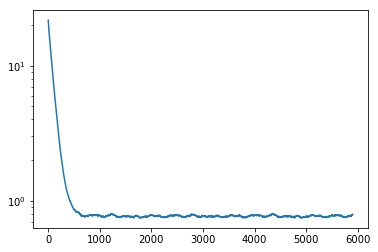

Initialized
Minibatch loss at step 0: 111.009201
Minibatch accuracy: 6.2%
Validation accuracy: 9.2%
Minibatch loss at step 500: 0.699038
Minibatch accuracy: 86.7%
Validation accuracy: 80.4%
Minibatch loss at step 1000: 0.906070
Minibatch accuracy: 77.3%
Validation accuracy: 80.3%
Minibatch loss at step 1500: 0.677283
Minibatch accuracy: 82.8%
Validation accuracy: 79.9%
Minibatch loss at step 2000: 0.765281
Minibatch accuracy: 85.9%
Validation accuracy: 79.6%
Minibatch loss at step 2500: 0.887482
Minibatch accuracy: 78.1%
Validation accuracy: 79.6%
Minibatch loss at step 3000: 0.893244
Minibatch accuracy: 78.9%
Validation accuracy: 80.6%
Minibatch loss at step 3500: 0.887707
Minibatch accuracy: 79.7%
Validation accuracy: 78.1%
Minibatch loss at step 4000: 0.807243
Minibatch accuracy: 82.8%
Validation accuracy: 80.6%
Minibatch loss at step 4500: 0.834655
Minibatch accuracy: 79.7%
Validation accuracy: 80.6%
Minibatch loss at step 5000: 0.776288
Minibatch accuracy: 83.6%
Validation accurac

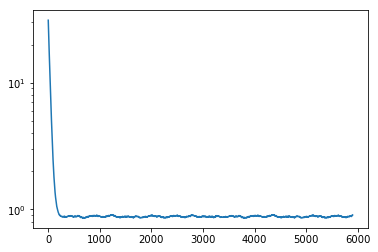

Initialized
Minibatch loss at step 0: 316.853058
Minibatch accuracy: 11.7%
Validation accuracy: 13.1%
Minibatch loss at step 500: 0.941593
Minibatch accuracy: 85.9%
Validation accuracy: 78.5%
Minibatch loss at step 1000: 1.108758
Minibatch accuracy: 75.8%
Validation accuracy: 78.4%
Minibatch loss at step 1500: 0.891036
Minibatch accuracy: 83.6%
Validation accuracy: 77.5%
Minibatch loss at step 2000: 1.018429
Minibatch accuracy: 78.9%
Validation accuracy: 74.1%
Minibatch loss at step 2500: 1.091351
Minibatch accuracy: 74.2%
Validation accuracy: 76.8%
Minibatch loss at step 3000: 1.103065
Minibatch accuracy: 75.8%
Validation accuracy: 77.8%
Minibatch loss at step 3500: 1.110519
Minibatch accuracy: 78.1%
Validation accuracy: 74.3%
Minibatch loss at step 4000: 1.040542
Minibatch accuracy: 79.7%
Validation accuracy: 78.0%
Minibatch loss at step 4500: 1.073624
Minibatch accuracy: 78.9%
Validation accuracy: 76.8%
Minibatch loss at step 5000: 0.979404
Minibatch accuracy: 82.0%
Validation accur

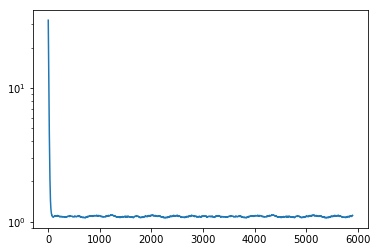

In [7]:
num_steps = 6001
reg_params = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
train_accuracy = []
valid_accuracy = []

for reg in reg_params: 
    minibatch_loss = np.zeros(num_steps)
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, tf_reg : [reg]}
            _, l, predictions = session.run(
              [optimizer, loss, train_prediction], feed_dict=feed_dict)
            minibatch_loss[step] = l
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(
                    valid_prediction.eval(), valid_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        train_accuracy.append(accuracy(train_prediction_entire.eval(), train_labels))
        valid_accuracy.append(accuracy(valid_prediction.eval(), valid_labels))
    N = 100
    minibatch_loss_filter = np.convolve(minibatch_loss, np.ones((N,))/N, mode='valid')
    plt.semilogy(minibatch_loss_filter)
    plt.show()

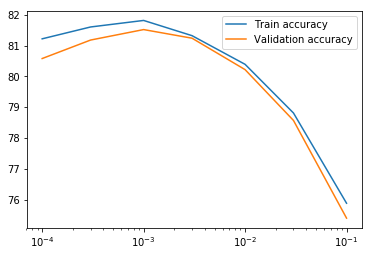

In [8]:
# Plot accuracy vs. regularization parameter
plt.semilogx(reg_params,train_accuracy,reg_params,valid_accuracy)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

Now, the neural network model

In [10]:
batch_size = 128
num_hidden_nodes = 1024;

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_reg = tf.placeholder(tf.float32, shape=(1))
    tf_train_dataset_entire = tf.constant(train_dataset)
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights1 = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_hidden_nodes]))
    biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    
    weights2 = tf.Variable(
        tf.truncated_normal([num_hidden_nodes, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    a1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    logits = tf.matmul(a1, weights2) + biases2
    loss = (tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
        + tf_reg*tf.nn.l2_loss(weights1) + tf_reg*tf.nn.l2_loss(weights2))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    train_a1_entire = tf.nn.relu(tf.matmul(tf_train_dataset_entire, weights1) + biases1)
    train_prediction_entire = tf.nn.softmax(
        tf.matmul(train_a1_entire, weights2) + biases2)
    valid_a1 = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    valid_prediction = tf.nn.softmax(
        tf.matmul(valid_a1, weights2) + biases2)
    test_a1 = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_prediction = tf.nn.softmax(
        tf.matmul(test_a1, weights2) + biases2)

Initialized
Minibatch loss at step 0: 390.422760
Minibatch accuracy: 10.9%
Validation accuracy: 37.5%
Minibatch loss at step 500: 43.455585
Minibatch accuracy: 80.5%
Validation accuracy: 80.4%
Minibatch loss at step 1000: 37.655048
Minibatch accuracy: 77.3%
Validation accuracy: 80.4%
Minibatch loss at step 1500: 32.218647
Minibatch accuracy: 86.7%
Validation accuracy: 81.9%
Minibatch loss at step 2000: 26.426712
Minibatch accuracy: 84.4%
Validation accuracy: 82.0%
Minibatch loss at step 2500: 26.976261
Minibatch accuracy: 82.0%
Validation accuracy: 82.0%
Minibatch loss at step 3000: 23.951015
Minibatch accuracy: 80.5%
Validation accuracy: 82.8%
Test accuracy: 89.9%


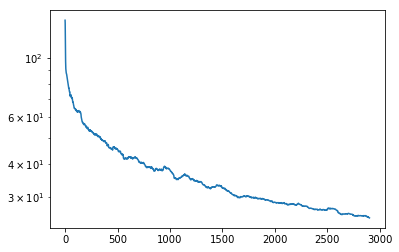

Initialized
Minibatch loss at step 0: 698.755737
Minibatch accuracy: 12.5%
Validation accuracy: 30.4%
Minibatch loss at step 500: 205.497192
Minibatch accuracy: 75.8%
Validation accuracy: 79.6%
Minibatch loss at step 1000: 113.849998
Minibatch accuracy: 82.8%
Validation accuracy: 81.4%
Minibatch loss at step 1500: 68.640923
Minibatch accuracy: 88.3%
Validation accuracy: 81.2%
Minibatch loss at step 2000: 41.279209
Minibatch accuracy: 90.6%
Validation accuracy: 84.7%
Minibatch loss at step 2500: 25.176298
Minibatch accuracy: 89.8%
Validation accuracy: 85.8%
Minibatch loss at step 3000: 15.523046
Minibatch accuracy: 82.8%
Validation accuracy: 86.4%
Test accuracy: 93.1%


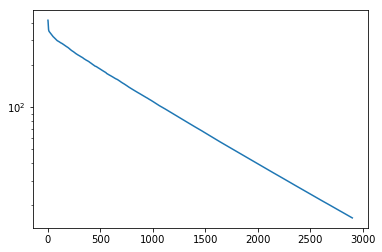

Initialized
Minibatch loss at step 0: 3425.963379
Minibatch accuracy: 10.9%
Validation accuracy: 28.7%
Minibatch loss at step 500: 21.190281
Minibatch accuracy: 85.2%
Validation accuracy: 84.2%
Minibatch loss at step 1000: 0.945113
Minibatch accuracy: 81.2%
Validation accuracy: 83.1%
Minibatch loss at step 1500: 0.588297
Minibatch accuracy: 85.9%
Validation accuracy: 83.7%
Minibatch loss at step 2000: 0.603324
Minibatch accuracy: 91.4%
Validation accuracy: 83.3%
Minibatch loss at step 2500: 0.715138
Minibatch accuracy: 82.8%
Validation accuracy: 83.5%
Minibatch loss at step 3000: 0.757554
Minibatch accuracy: 83.6%
Validation accuracy: 83.4%
Test accuracy: 90.3%


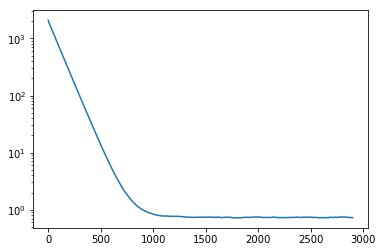

Initialized
Minibatch loss at step 0: 31750.751953
Minibatch accuracy: 6.2%
Validation accuracy: 28.6%
Minibatch loss at step 500: 1.309180
Minibatch accuracy: 82.8%
Validation accuracy: 78.6%
Minibatch loss at step 1000: 1.434333
Minibatch accuracy: 72.7%
Validation accuracy: 78.0%
Minibatch loss at step 1500: 1.228760
Minibatch accuracy: 85.9%
Validation accuracy: 78.6%
Minibatch loss at step 2000: 1.369606
Minibatch accuracy: 74.2%
Validation accuracy: 70.5%
Minibatch loss at step 2500: 1.409085
Minibatch accuracy: 76.6%
Validation accuracy: 77.3%
Minibatch loss at step 3000: 1.492478
Minibatch accuracy: 69.5%
Validation accuracy: 75.6%
Test accuracy: 82.4%


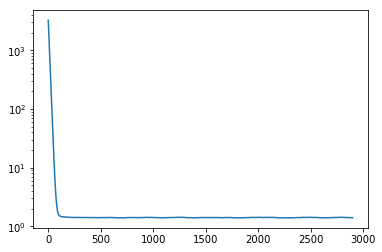

In [11]:
num_steps = 3001

# reg_params = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
reg_params = [1e-4, 1e-3, 1e-2, 1e-1]
train_accuracy = []
valid_accuracy = []

for reg in reg_params:
    minibatch_loss = np.zeros(num_steps)
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, tf_reg : [reg]}
            _, l, predictions = session.run(
              [optimizer, loss, train_prediction], feed_dict=feed_dict)
            minibatch_loss[step] = l
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(
                    valid_prediction.eval(), valid_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        train_accuracy.append(accuracy(train_prediction_entire.eval(), train_labels))
        valid_accuracy.append(accuracy(valid_prediction.eval(), valid_labels))
    N = 100
    minibatch_loss_filter = np.convolve(minibatch_loss, np.ones((N,))/N, mode='valid')
    plt.semilogy(minibatch_loss_filter)
    plt.show()

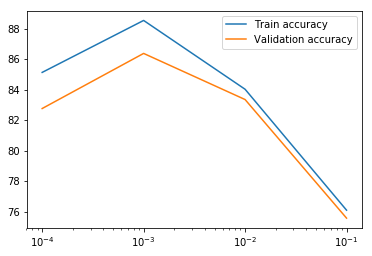

In [12]:
# Plot loss vs. regularization parameter
plt.semilogx(reg_params,train_accuracy,reg_params,valid_accuracy)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

Initialized
Minibatch loss at step 0: 348.012939
Minibatch accuracy: 13.3%
Validation accuracy: 28.7%
Minibatch loss at step 500: 29.863832
Minibatch accuracy: 100.0%
Validation accuracy: 74.1%
Minibatch loss at step 1000: 28.407339
Minibatch accuracy: 100.0%
Validation accuracy: 74.1%
Minibatch loss at step 1500: 27.021843
Minibatch accuracy: 100.0%
Validation accuracy: 74.1%
Minibatch loss at step 2000: 25.703934
Minibatch accuracy: 100.0%
Validation accuracy: 74.1%
Minibatch loss at step 2500: 24.450315
Minibatch accuracy: 100.0%
Validation accuracy: 74.1%
Minibatch loss at step 3000: 23.257818
Minibatch accuracy: 100.0%
Validation accuracy: 74.1%
Test accuracy: 81.7%


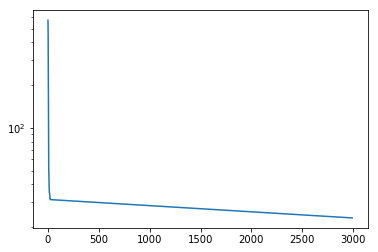

Initialized
Minibatch loss at step 0: 663.163818
Minibatch accuracy: 10.2%
Validation accuracy: 32.8%
Minibatch loss at step 500: 190.488968
Minibatch accuracy: 100.0%
Validation accuracy: 75.2%
Minibatch loss at step 1000: 115.523026
Minibatch accuracy: 100.0%
Validation accuracy: 75.3%
Minibatch loss at step 1500: 70.059479
Minibatch accuracy: 100.0%
Validation accuracy: 75.4%
Minibatch loss at step 2000: 42.487915
Minibatch accuracy: 100.0%
Validation accuracy: 75.5%
Minibatch loss at step 2500: 25.767086
Minibatch accuracy: 100.0%
Validation accuracy: 75.5%
Minibatch loss at step 3000: 15.627065
Minibatch accuracy: 100.0%
Validation accuracy: 75.6%
Test accuracy: 82.4%


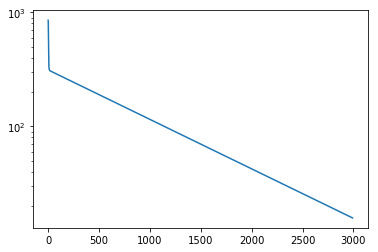

Initialized
Minibatch loss at step 0: 3451.105713
Minibatch accuracy: 8.6%
Validation accuracy: 32.5%
Minibatch loss at step 500: 20.999998
Minibatch accuracy: 100.0%
Validation accuracy: 76.9%
Minibatch loss at step 1000: 0.450611
Minibatch accuracy: 100.0%
Validation accuracy: 78.7%
Minibatch loss at step 1500: 0.305230
Minibatch accuracy: 100.0%
Validation accuracy: 78.5%
Minibatch loss at step 2000: 0.261459
Minibatch accuracy: 100.0%
Validation accuracy: 78.4%
Minibatch loss at step 2500: 0.270200
Minibatch accuracy: 100.0%
Validation accuracy: 78.8%
Minibatch loss at step 3000: 0.283132
Minibatch accuracy: 100.0%
Validation accuracy: 78.5%
Test accuracy: 85.5%


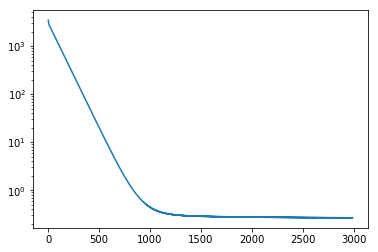

Initialized
Minibatch loss at step 0: 31768.552734
Minibatch accuracy: 7.8%
Validation accuracy: 28.6%
Minibatch loss at step 500: 1.127547
Minibatch accuracy: 96.1%
Validation accuracy: 74.5%
Minibatch loss at step 1000: 1.272555
Minibatch accuracy: 89.1%
Validation accuracy: 76.5%
Minibatch loss at step 1500: 1.384097
Minibatch accuracy: 85.2%
Validation accuracy: 75.9%
Minibatch loss at step 2000: 1.124771
Minibatch accuracy: 95.3%
Validation accuracy: 73.1%
Minibatch loss at step 2500: 1.272843
Minibatch accuracy: 88.3%
Validation accuracy: 75.3%
Minibatch loss at step 3000: 1.383356
Minibatch accuracy: 83.6%
Validation accuracy: 75.6%
Test accuracy: 82.5%


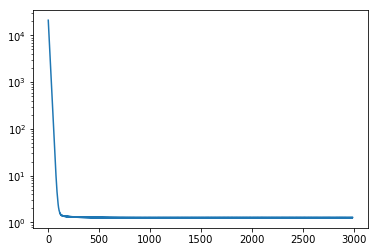

In [13]:
num_steps = 3001

# reg_params = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
reg_params = [1e-4, 1e-3, 1e-2, 1e-1]
train_accuracy = []
valid_accuracy = []

for reg in reg_params:
    minibatch_loss = np.zeros(num_steps)
    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (3*batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, tf_reg : [reg]}
            _, l, predictions = session.run(
              [optimizer, loss, train_prediction], feed_dict=feed_dict)
            minibatch_loss[step] = l
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(
                    valid_prediction.eval(), valid_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
        train_accuracy.append(accuracy(train_prediction_entire.eval(), train_labels))
        valid_accuracy.append(accuracy(valid_prediction.eval(), valid_labels))
    N = 10
    minibatch_loss_filter = np.convolve(minibatch_loss, np.ones((N,))/N, mode='valid')
    plt.semilogy(minibatch_loss_filter)
    plt.show()

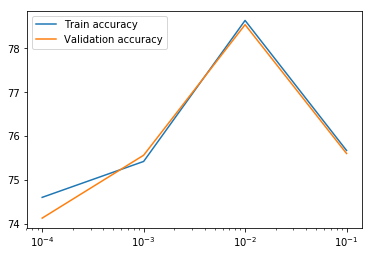

In [14]:
plt.semilogx(reg_params,train_accuracy,reg_params,valid_accuracy)
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

In [15]:
batch_size = 128
num_hidden_nodes = 1024;

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    keep_prob  = tf.placeholder(tf.float32)
    tf_train_dataset_entire = tf.constant(train_dataset)
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights1 = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_hidden_nodes]))
    biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    
    weights2 = tf.Variable(
        tf.truncated_normal([num_hidden_nodes, num_labels]))
    biases2 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    a1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    a1_drop = tf.nn.dropout(a1, keep_prob)
    logits = tf.matmul(a1_drop, weights2) + biases2
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    train_a1_entire = tf.nn.relu(tf.matmul(tf_train_dataset_entire, weights1) + biases1)
    train_prediction_entire = tf.nn.softmax(
        tf.matmul(train_a1_entire, weights2) + biases2)
    valid_a1 = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    valid_prediction = tf.nn.softmax(
        tf.matmul(valid_a1, weights2) + biases2)
    test_a1 = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_prediction = tf.nn.softmax(
        tf.matmul(test_a1, weights2) + biases2)

In [16]:
num_steps = 6001
minibatch_loss = np.zeros(num_steps)

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        # offset = (step * batch_size) % (3*batch_size)
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : 0.5}
        _ = session.run(optimizer, feed_dict=feed_dict)
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : 1.0}
        l, predictions = session.run(
          [loss, train_prediction], feed_dict=feed_dict)
        minibatch_loss[step] = l
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(
                valid_prediction.eval(), valid_labels))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
    train_accuracy.append(accuracy(train_prediction_entire.eval(), train_labels))
    valid_accuracy.append(accuracy(valid_prediction.eval(), valid_labels))

Initialized
Minibatch loss at step 0: 502.260803
Minibatch accuracy: 35.9%
Validation accuracy: 29.0%
Minibatch loss at step 500: 23.543411
Minibatch accuracy: 88.3%
Validation accuracy: 77.2%
Minibatch loss at step 1000: 4.923193
Minibatch accuracy: 85.9%
Validation accuracy: 80.2%
Minibatch loss at step 1500: 1.678985
Minibatch accuracy: 92.2%
Validation accuracy: 79.6%
Minibatch loss at step 2000: 0.994466
Minibatch accuracy: 89.8%
Validation accuracy: 79.6%
Minibatch loss at step 2500: 1.412913
Minibatch accuracy: 83.6%
Validation accuracy: 79.1%
Minibatch loss at step 3000: 0.823280
Minibatch accuracy: 88.3%
Validation accuracy: 80.8%
Minibatch loss at step 3500: 1.697431
Minibatch accuracy: 83.6%
Validation accuracy: 79.6%
Minibatch loss at step 4000: 1.699315
Minibatch accuracy: 89.1%
Validation accuracy: 79.9%
Minibatch loss at step 4500: 1.192765
Minibatch accuracy: 83.6%
Validation accuracy: 79.3%
Minibatch loss at step 5000: 2.170887
Minibatch accuracy: 86.7%
Validation accu

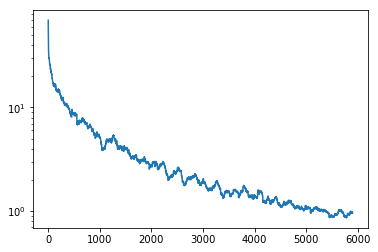

In [17]:
# Plot smoothed loss vs. iteration
N = 100
minibatch_loss_filter = np.convolve(minibatch_loss, np.ones((N,))/N, mode='valid')
plt.semilogy(minibatch_loss_filter)
plt.show()

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---


In [18]:
batch_size = 128
num_hidden_nodes = 256

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    keep_prob  = tf.placeholder(tf.float32)
    tf_train_dataset_entire = tf.constant(train_dataset)
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights1 = tf.Variable(
        tf.truncated_normal([image_size * image_size, num_hidden_nodes]))
    biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    
    weights2 = tf.Variable(
        tf.truncated_normal([num_hidden_nodes, num_hidden_nodes]))
    biases2 = tf.Variable(tf.zeros([num_hidden_nodes]))
    
    weights3 = tf.Variable(
        tf.truncated_normal([num_hidden_nodes, num_labels]))
    biases3 = tf.Variable(tf.zeros([num_labels]))

    # Training computation.
    a1 = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
    a2 = tf.nn.relu(tf.matmul(a1, weights2) + biases2)
    a2_drop = tf.nn.dropout(a2, keep_prob)
    logits = tf.matmul(a2_drop, weights3) + biases3
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    train_a1_entire = tf.nn.relu(tf.matmul(tf_train_dataset_entire, weights1) + biases1)
    train_a2_entire = tf.nn.relu(tf.matmul(train_a1_entire, weights2) + biases2)
    train_prediction_entire = tf.nn.softmax(
        tf.matmul(train_a2_entire, weights3) + biases3)
    valid_a1 = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
    valid_a2 = tf.nn.relu(tf.matmul(valid_a1, weights2) + biases2)
    valid_prediction = tf.nn.softmax(
        tf.matmul(valid_a2, weights3) + biases3)
    test_a1 = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
    test_a2 = tf.nn.relu(tf.matmul(test_a1, weights2) + biases2)
    test_prediction = tf.nn.softmax(
        tf.matmul(test_a2, weights3) + biases3)